In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio 
from collections import defaultdict

In [23]:
from mpl_toolkits import mplot3d
from collections import defaultdict
from scipy.stats.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import normaltest
from pandas.plotting import parallel_coordinates
from kneed import KneeLocator

In [4]:
X_train = np.load("RavdessAudioOnlyNumpy__X_train.npy")
X_test = np.load("RavdessAudioOnlyNumpy__X_test.npy")
y_train=pd.read_csv("RavdessAudioOnlyNumpy__Y_train.csv")
y_test=pd.read_csv("RavdessAudioOnlyNumpy__Y_test.csv")
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1828, 304304) (624, 304304)
(1828, 9) (624, 9)


In [5]:
X_train[np.isnan(X_train)] = 0
X_test[np.isnan(X_test)] = 0

In [6]:
df_train=pd.DataFrame(X_train)
df_test=pd.DataFrame(X_test)

In [7]:
X_train_decimated = np.load("RavdessAudioOnlyNumpy__X_train_decimated.npy")
X_test_decimated = np.load("RavdessAudioOnlyNumpy__X_test_decimated.npy")

In [8]:
df_train_decimated=pd.DataFrame(X_train_decimated)
df_test_decimated=pd.DataFrame(X_test_decimated)

In [9]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from scipy.signal import decimate

In [10]:
scaler = TimeSeriesScalerMeanVariance(mu=0, std=1)

In [11]:
X_train_decimated_scaled=scaler.fit_transform(X_train_decimated)
X_test_decimated_scaled=scaler.transform(X_test_decimated)

In [12]:
X_train_decimated_scaled=X_train_decimated_scaled[:,:,0]
X_test_decimated_scaled=X_test_decimated_scaled[:,:,0]

In [13]:
df_train_decimated_scaled=pd.DataFrame(X_train_decimated_scaled)
df_test_decimated_scaled=pd.DataFrame(X_test_decimated_scaled)

# smoothing

In [14]:
df_train_decimated_scaled_smoothed=df_train_decimated_scaled.T - df_train_decimated_scaled.T.rolling(window=20).mean()

In [15]:
df_train_decimated_scaled_smoothed.shape

(38038, 1828)

# clustering Shape-based K-means

In [17]:
from tslearn.clustering import TimeSeriesKMeans

In [18]:
np.squeeze(df_train_decimated_scaled_smoothed).shape

(38038, 1828)

In [ ]:
df_train_decimated_scaled_smoothed

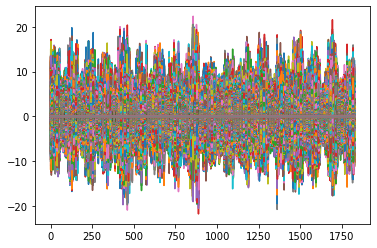

In [19]:
plt.plot(np.squeeze(df_train_decimated_scaled_smoothed).T)
plt.show()

In [43]:
sse_list = []
for k in range(1, 15):
    kmeans = TimeSeriesKMeans(n_clusters=k, metric="euclidean", 
                      max_iter=5, random_state=0)
    kmeans.fit(np.squeeze(X_train).T)
    sse_list.append(kmeans.inertia_)

In [44]:
from sklearn.metrics import silhouette_score

In [45]:
sse_list

[0.9830507768889789,
 0.9827880394456862,
 0.9797741447094827,
 0.9796523636611072,
 0.9794031421913916,
 0.9788946189131986,
 0.9787825187575325,
 0.9781955717256097,
 0.9779634186362897,
 0.9777832090073407,
 0.977571111450961,
 0.9773970075029471,
 0.977059291936719,
 0.9768469470290083]

In [46]:
X_train

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -3.05175781e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.05175781e-05,  3.05175781e-05,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [38]:
'''
km = TimeSeriesKMeans(n_clusters=15, metric="euclidean", 
                      max_iter=5, random_state=0)
km.fit(np.squeeze(X_train).T)

TimeSeriesKMeans(max_iter=5, n_clusters=15, random_state=0)

In [47]:
np.squeeze(km.cluster_centers_).T

array([[ 1.52587891e-05, -8.14414207e-05,  4.91002788e-06, ...,
        -8.91355005e-06,  1.49066632e-04,  1.80614238e-05],
       [-2.51770020e-05, -1.25665733e-04,  9.21795031e-06, ...,
         3.63793704e-04, -1.55404898e-03, -5.97895408e-05],
       [-3.81469727e-06,  5.08126938e-05, -3.94279882e-06, ...,
        -5.00065265e-04, -3.05175781e-05,  4.85790019e-05],
       ...,
       [ 1.56478882e-03, -3.32431385e-05,  1.21153482e-05, ...,
        -5.78806660e-03, -3.12323937e-02, -5.89549785e-03],
       [ 1.28456116e-02,  9.16587284e-04, -6.03679612e-05, ...,
        -1.89556462e-03, -3.62689678e-04, -6.29720882e-03],
       [ 2.12356567e-02, -5.00678362e-04,  2.32955296e-05, ...,
         1.80386081e-04,  2.80526968e-04,  8.64394830e-03]])

In [48]:
km.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
kmeans = TimeSeriesKMeans(n_clusters=15, metric="euclidean", 
                      max_iter=5, random_state=0)
kmeans.fit(np.squeeze(X_train).T)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('sse', kmeans.inertia_)
print('silhouette', silhouette_score(np.squeeze(X_train).T, kmeans.labels_))

labels {0: 48, 1: 20636, 2: 280836, 3: 113, 4: 463, 5: 30, 6: 23, 7: 26, 8: 49, 9: 26, 10: 89, 11: 24, 12: 1849, 13: 26, 14: 66}
sse 0.9766095507210422
